<center>
    <br>
        <br>
            <br>
                <h5 style = "color:blue">=========================================================================================================</h5>
                <h2 style = "color:green">Assignment Part 1</h2>
                <h3 style = "color:orange">( Task - 2 )</h3>
                <h5 style = "color:blue">=========================================================================================================</h5>
            <br>
        <br>
    <br>
</center>

**Task-2** Classification on Landsat Satellite Data (2.5 marks): The data set consists of the multi-spectral values of pixels in 3x3 neighbourhoods in a satellite image, and the label information associated with the central pixel in each neighbourhood. This data set was generated from Landsat Multi-Spectral Scanner image data. To facilitate your data analysis process, we have done sampling and data pre-processing for you. All the features are named as “Feature #”, and the last attribute is the label (each number corresponds to a class). This is a multi-class classification problem.

Notes:

1). You need to tune the hyperparameter K for the KNN classifier, and impurity heuristics (information gain or Gini) for the decision tree classifier. Also, the pruning methods could be considered to tune the decision trees.


# Import Libraries

In [22]:
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
from numpy import sqrt
from numpy import mean
from numpy import absolute
from sklearn import metrics
from sklearn import neighbors
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
from scipy.spatial.distance import pdist
from sklearn.metrics import pairwise_distances
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from sklearn.metrics import accuracy_score, confusion_matrix, balanced_accuracy_score, classification_report

# Load Dataset

In [3]:
# Load Dataset

dataset = pd.read_csv('Dataset/landsat/landsat.csv')
dataset

Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  Feature 6  \
0            92        115        120         94         84        102   
1            84        102        106         79         84        102   
2            84        102        102         83         80        102   
3            80        102        102         79         84         94   
4            84         94        102         79         80         94   
...         ...        ...        ...        ...        ...        ...   
5995         51         68         85         71         51         75   
5996         55         75         96         79         55         72   
5997         55         72         93         71         55         72   
5998         55         72         85         75         59         79   
5999         59         79         93         75         59         91   

      Feature 7  Feature 8  Feature 9  Feature 10  ...  Feature 28  \
0           106         79         84         102  ...         104   
1           102         83         80         102  ...         100   
2           102         79         84          94  ...          87   
3           102         79         80          94  ...          79   
4            98         76         80         102  ...          79   
...         ...        ...        ...         ...  ...         ...   
5995         93         79         55          75  ...          79   
5996         93         71         55          72  ...          79   
5997         85         75         59          79  ...          72   
5998         93         75         59          91  ...          68   
5999        104         83         59          87  ...          72   

      Feature 29  Feature 30  Feature 31  Feature 32  Feature 33  Feature 34  \
0             88         121         128         100          84         107   
1             84         107         113          87          84          99   
2             84          99         104          79          84          99   
3             84          99         104          79          84         103   
4             84         103         104          79          79         107   
...          ...         ...         ...         ...         ...         ...   
5995          56          81          97          79          52          73   
5996          52          66          86          72          52          66   
5997          52          66          82          68          56          70   
5998          56          70          82          72          56          84   
5999          56          84          97          79          59          91   

      Feature 35  Feature 36  Label  
0            113          87      3  
1            104          79      3  
2            104          79      3  
3            104          79      3  
4            109          87      3  
...          ...         ...    ...  
5995          93          79      1  
5996          82          68      1  
5997          82          72      1  
5998          97          79      1  
5999         101          86      1  

[6000 rows x 37 columns]

# Training Features and Output Labels 

In [4]:
X = dataset.drop(['Label'], axis=1)
y = dataset['Label']

# Tune the Hyperparameter K for the KNN

In [7]:
from sklearn.model_selection import GridSearchCV

In [11]:
random_grid = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}

rf = neighbors.KNeighborsClassifier()

clf = GridSearchCV(estimator=rf, param_grid=random_grid, cv=10, n_jobs=-1, verbose=2)
clf.fit(X,y)
clfa = clf.best_estimator_

Fitting 10 folds for each of 15 candidates, totalling 150 fits


In [12]:
clfa

KNeighborsClassifier(n_neighbors=7)

# Train Model on Best Parameters

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [14]:
# Fit Model
clfa.fit(X_train, y_train)

# Get Predictions
predictions_a = clfa.predict(X_test)



Accuracy Score:


  Accuracy:  91.36 %


Classification Report:


              precision    recall  f1-score   support

           1       0.99      0.98      0.98       437
           2       0.97      0.96      0.97       218
           3       0.90      0.96      0.93       419
           4       0.70      0.72      0.71       197
           5       0.91      0.93      0.92       202
           7       0.92      0.87      0.90       507

    accuracy                           0.91      1980
   macro avg       0.90      0.90      0.90      1980
weighted avg       0.91      0.91      0.91      1980



Confusion Matrix:


[[429   1   6   0   1   0]
 [  0 210   1   6   1   0]
 [  2   0 402  12   0   3]
 [  0   1  26 141   3  26]
 [  4   2   1   1 187   7]
 [  0   2  11  41  13 440]]


Confusion Matrix with Heat MAP:




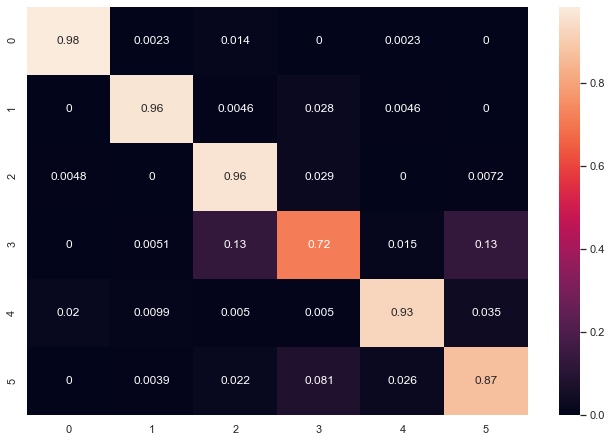

In [21]:
# Accuracy Score
accuracy = accuracy_score(y_test, predictions_a)
print("\n\n======================")
print("Accuracy Score:")
print("======================\n\n")
print("  Accuracy: ", round(accuracy*100,2), "%")

# Classification Report
report = classification_report(y_test, predictions_a)
print("\n\n======================")
print("Classification Report:")
print("======================\n\n")
print(report)

# Confusion Matrix
matrix = confusion_matrix(y_test, predictions_a)
print("\n\n=================")
print("Confusion Matrix:")
print("=================\n\n")
print(matrix)

# Heat Map
print("\n\n===============================")
print("Confusion Matrix with Heat MAP:")
print("===============================\n\n")
confusion_matrix_heatmap = confusion_matrix(y_test, predictions_a, normalize = 'true')
sns.set(rc={'figure.figsize':(10,7)})
sns.heatmap(confusion_matrix_heatmap, annot=True)
plt.show()

# Decision Tree

In [23]:
rf2 = DecisionTreeClassifier()

random_grid = {'criterion': ['gini','entropy']}

clf2 = GridSearchCV(estimator=rf2, param_grid=random_grid, cv=10, n_jobs=-1, verbose=2)
clf2.fit(X,y)
clfa2 = clf2.best_estimator_

Fitting 10 folds for each of 2 candidates, totalling 20 fits


# Train Model on Best Parameters

In [26]:
# Fit Model
clfa2.fit(X_train, y_train)

# Get Predictions
predictions_b = clfa2.predict(X_test)



Accuracy Score:


  Accuracy:  86.01 %


Classification Report:


              precision    recall  f1-score   support

           1       0.96      0.94      0.95       437
           2       0.97      0.91      0.94       218
           3       0.87      0.90      0.89       419
           4       0.57      0.55      0.56       197
           5       0.82      0.88      0.85       202
           7       0.85      0.85      0.85       507

    accuracy                           0.86      1980
   macro avg       0.84      0.84      0.84      1980
weighted avg       0.86      0.86      0.86      1980



Confusion Matrix:


[[411   0   8   3  10   5]
 [  3 198   2   3  11   1]
 [  3   0 378  28   2   8]
 [  1   0  33 109   1  53]
 [  7   2   0   5 177  11]
 [  1   4  14  43  15 430]]


Confusion Matrix with Heat MAP:




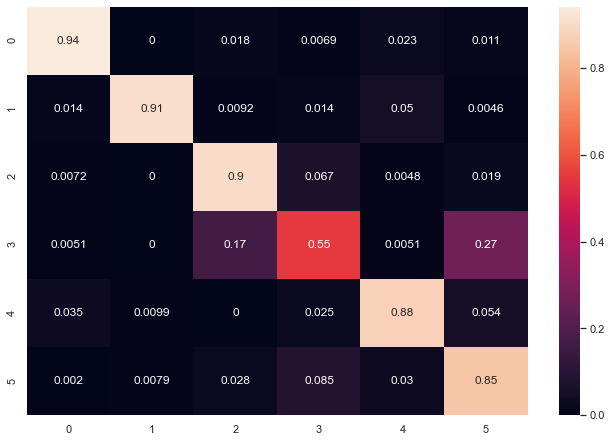

In [27]:
# Accuracy Score
accuracy = accuracy_score(y_test, predictions_b)
print("\n\n======================")
print("Accuracy Score:")
print("======================\n\n")
print("  Accuracy: ", round(accuracy*100,2), "%")

# Classification Report
report = classification_report(y_test, predictions_b)
print("\n\n======================")
print("Classification Report:")
print("======================\n\n")
print(report)

# Confusion Matrix
matrix = confusion_matrix(y_test, predictions_b)
print("\n\n=================")
print("Confusion Matrix:")
print("=================\n\n")
print(matrix)

# Heat Map
print("\n\n===============================")
print("Confusion Matrix with Heat MAP:")
print("===============================\n\n")
confusion_matrix_heatmap = confusion_matrix(y_test, predictions_b, normalize = 'true')
sns.set(rc={'figure.figsize':(10,7)})
sns.heatmap(confusion_matrix_heatmap, annot=True)
plt.show()

<center>
    <br>
        <br>
            <br>
                <h5 style = "color:blue">=========================================================================================================</h5>
                <h2 style = "color:green">Thank you so much</h2>
                <h5 style = "color:blue">=========================================================================================================</h5>
            <br>
        <br>
    <br>
</center>